In [1]:
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import numpy as np
from pandas_datareader import data
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

#download data into DataFrame and create moving averages columns
df = data.DataReader('AAPL', 'yahoo', start='1/1/2014', end='1/1/2016')

C:\Users\s2007\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<IPython.core.display.Javascript object>


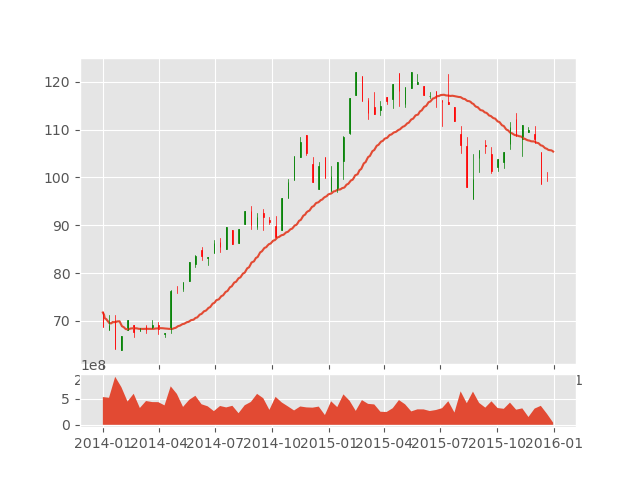

In [2]:
#style.use('ggplot')
#df = pd.read_csv('stock_dfs_handmade/tsla.csv', parse_dates=True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()     # resample-> shrink size
df_volume = df['Volume'].resample('10D').sum()       # or mean

df_ohlc.reset_index(inplace=True)

df_ohlc['Date'] = df_ohlc['Date'].map(date2num)
%matplotlib notebook
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
ax1.plot(df.index, df['100ma'])
candlestick_ohlc(ax1, df_ohlc.values, width=1, colorup='g')

ax2.fill_between(df_volume.index.map(date2num), df_volume.values, 0)


,Date,open,high,low,close
0,735233.0,71.756508,71.756508,68.622864,68.622864
1,735243.0,68.164963,71.288383,68.164963,69.153648
2,735253.0,70.228043,71.137444,64.047737,64.047737
3,735263.0,63.923672,66.866844,63.923672,66.866844
4,735273.0,68.064728,70.252129,68.064728,70.252129
...,...,...,...,...,...
69,735923.0,109.477264,110.527870,109.477264,109.988617
70,735933.0,109.096039,110.667328,107.106407,108.008263
71,735943.0,105.228317,105.228317,98.580650,98.580650
72,735953.0,99.789322,101.100266,99.315170,99.780022
